In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("../data/clean_weather.csv", index_col=0)
data.head()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [4]:
data.isnull().sum()

tmax              11
tmin              14
rain             281
tmax_tomorrow     11
dtype: int64

In [5]:
# since we have a lot of missing values 
# we will fill the missing values with the values of the previous rows

data = data.ffill() # this method will fill the missing values

In [6]:
data.isnull().sum().any()

False

In [7]:
data.shape

(13509, 4)

### Let's visualize the data we have

Let's create a scatter plot and check the relationship between the data points `tmax` and `tmax_tomorrow`.

This will help us decipher the correlation between these two data points. 

<AxesSubplot:xlabel='tmax', ylabel='tmax_tomorrow'>

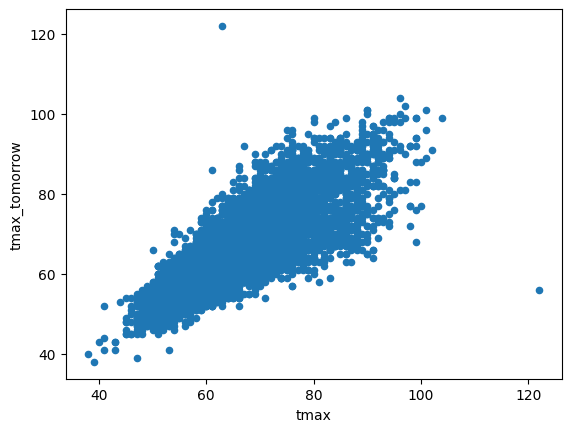

In [8]:
data.plot.scatter("tmax", "tmax_tomorrow")


If we draw a line through this graph, it will help us explain the linear relationship.

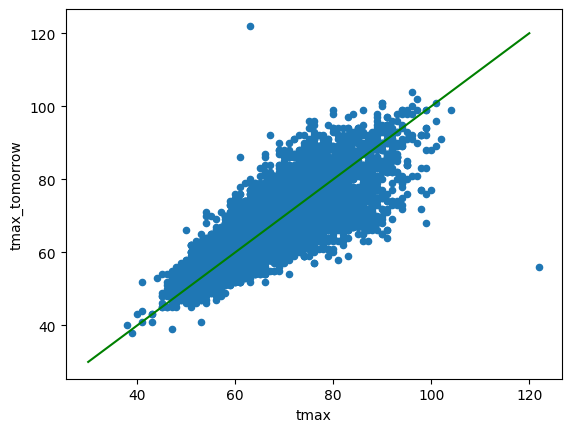

In [9]:
import matplotlib.pyplot as plt

data.plot.scatter('tmax', "tmax_tomorrow")
plt.plot([30, 120], [30,120], 'green')

$\hat {y} = w_{1} * x_{1} + b$

$\hat {y} = w_{1} * x_{1} + w_{2} * x_{2} + w_{3} * x_{3} + w_{4} * x_{4} + b$

In [10]:
X = data['tmax'].values.reshape(-1,1)
y = data['tmax_tomorrow'].values

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

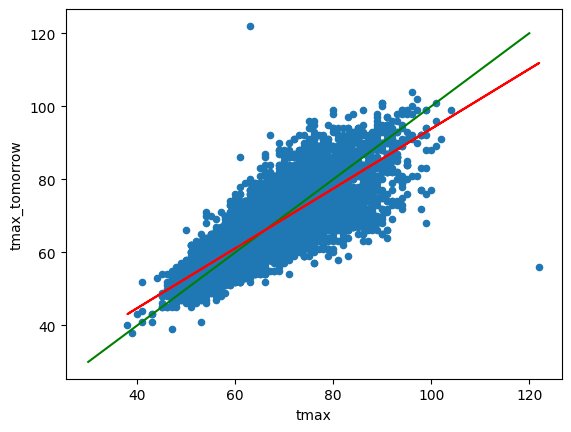

In [12]:
data.plot.scatter('tmax', "tmax_tomorrow")
plt.plot([30, 120], [30,120], 'green')
plt.plot(data['tmax'],lr.predict(X),'red')

In [13]:
print("weight: ", lr.coef_[0])
print("bias: ", lr.intercept_)

weight:  0.8185468304066474
bias:  11.9865613801297


$MSE=(\hat{y}-y)^2$

In [14]:
0.82 * 80 + 11.99

77.58999999999999

In [15]:
(77.59 - 81.0) ** 2

11.628099999999977

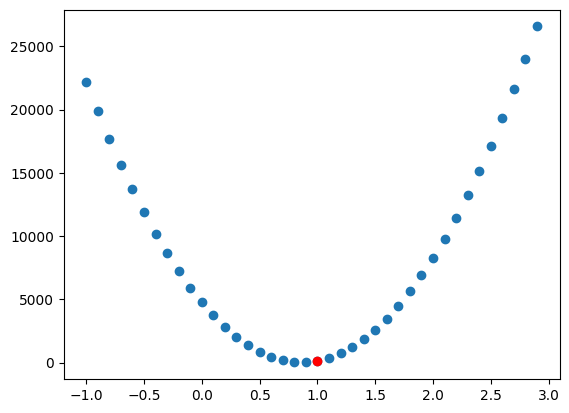

In [22]:
import numpy as np

loss = lambda w, y: ((w * 80 + 11.99) - y) ** 2
y = 81

ws = np.arange(-1, 3, .1)

losses = loss(ws, y)
plt.scatter(ws, losses)
plt.plot(1, loss(1,y), 'ro')